In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
from mpl_toolkits.mplot3d import Axes3D
from math import pi
import scipy.spatial as scpspatial
import scipy.stats as stats
import math

import matplotlib.pyplot as plt
from pySOT.surrogate import RBFInterpolant, CubicKernel, LinearTail
from util import *

plt.style.use("bmh")
plt.rcParams["image.cmap"] = "Blues"

from tqdm.notebook import tqdm

train_x = np.array([[1/13,1/6],[1/13,3/8],[1/13,7/12],[1/13,19/24],[1/13,1],
                        [5/13,1/6],[5/13,3/8],[5/13,7/12],[5/13,19/24],[5/13,1],
                        [9/13,1/6],[9/13,3/8],[9/13,7/12],[9/13,19/24],[9/13,1],
                        [1,1/6],[1,3/8],[1,7/12],[1,19/24],[1,1]])

train_y = np.array([0,2,2,1,2,2,5,5,4,4,8,6,7,10,6,6,9,9,8,8])


x1_range = np.linspace(0, 1, 53)
x2_range = np.linspace(0, 1, 97)
X1, X2 = np.meshgrid(x1_range, x2_range)
xs= np.vstack((X1.flatten(), X2.flatten())).transpose(-1, -2) 

In [28]:
rbf = RBFInterpolant(
    dim=2, lb=np.array([0,0]), ub=np.array([1,1]), kernel=CubicKernel(), tail=LinearTail(2))

rbf.add_points(train_x,train_y)
fX_pred = rbf.predict(xs)

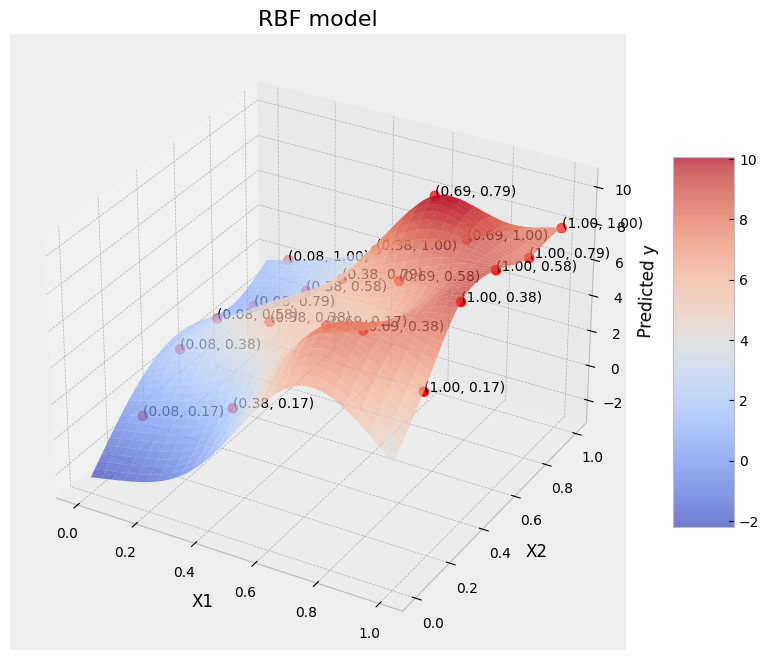

In [29]:
visualize_rbf_belief(fX_pred, train_x, train_y, X1, X2)

In [30]:
x1_fine = np.linspace(2/130, 8/130, 4)  # 在50到60之间生成更多的点
x2_fine = np.linspace(115/2400, 235/2400, 9)  # 在200到350之间生成更多的点
X1_fine, X2_fine = np.meshgrid(x1_fine, x2_fine)
xs_fine= np.vstack((X1_fine.flatten(), X2_fine.flatten())).transpose(-1, -2) 
xs = np.concatenate((xs,xs_fine))

In [31]:
weights = np.linspace(0.3,1,20)
suggest_x = weighted_distance_merit(20, rbf, train_x, xs, weights, dtol=1e-3)
suggest_y = rbf.predict(suggest_x)

In [32]:
suggest_x

array([[0.23076923, 0.        ],
       [0.        , 0.        ],
       [0.53846154, 0.        ],
       [0.23076923, 0.27083333],
       [0.23076923, 0.89583333],
       [0.11538462, 0.        ],
       [0.38461538, 0.        ],
       [0.21153846, 0.13541667],
       [0.        , 0.10416667],
       [0.05769231, 0.        ],
       [0.09615385, 0.08333333],
       [0.17307692, 0.        ],
       [0.        , 0.05208333],
       [0.01923077, 0.        ],
       [0.03846154, 0.        ],
       [0.        , 0.01041667],
       [0.01923077, 0.01041667],
       [0.07692308, 0.        ],
       [0.        , 0.02083333],
       [0.03846154, 0.01041667]])

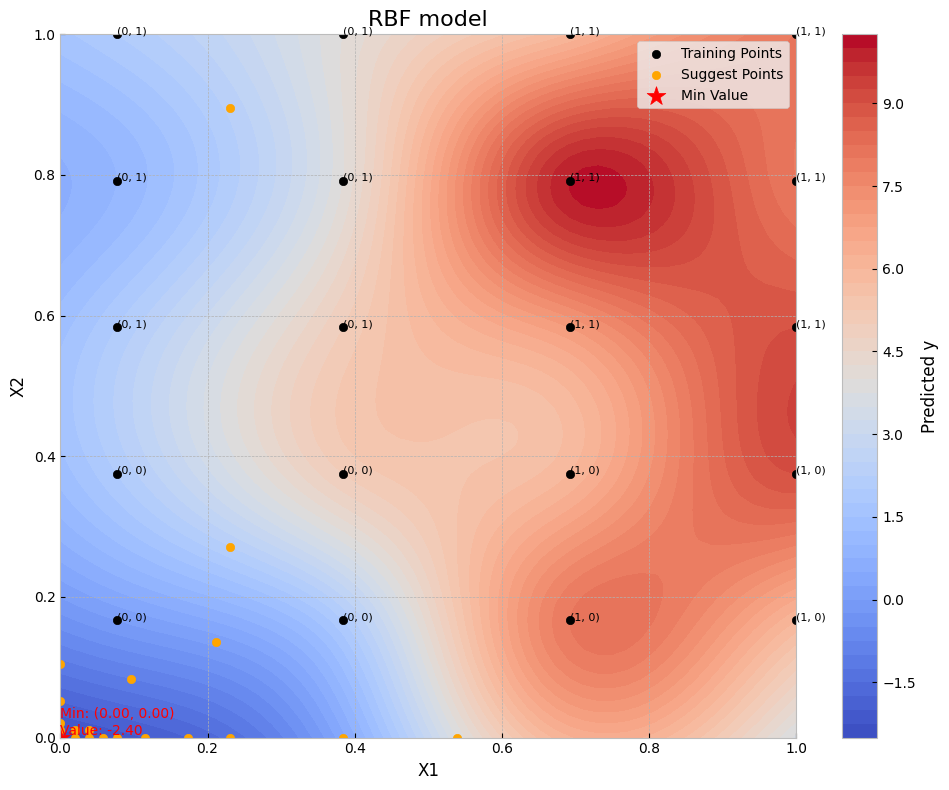

In [33]:
visualize_rbf_contour(fX_pred, train_x, X1, X2, suggest_x)

In [36]:
x1 = suggest_x[:,0]*130+50
x2 = suggest_x[:,1]*2400+100
df = pd.DataFrame({  
    "x1":x1,   
    "x2":x2,
    "predict_y":suggest_y.flatten(),
})
df.to_csv('RBF.csv')
df

,x1,x2,predict_y
0,80.0,100.0,-1.416397
1,50.0,100.0,-2.398030
2,120.0,100.0,3.723485
3,80.0,750.0,2.225478
4,80.0,2250.0,2.321823
5,65.0,100.0,-1.994649
6,100.0,100.0,0.424263
7,77.5,425.0,0.081470
8,50.0,350.0,-1.092438
9,57.5,100.0,-2.198154
